In [1]:
# 0 = No
# 1 = Yes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

from sklearn import preprocessing

In [3]:
models = []
accuracy = []
f1 = []
def score(model: str, test, predicted):
    print(f"Model: {model}")
    models.append(model) # adding the values in the models list
    # Calculate accuracy_LR
    accuracy_LR = accuracy_score(test, predicted)
    accuracy.append(round(accuracy_LR*100, 2)) # adding the values in the accuracy list
    print("\naccuracy_LR:", round(accuracy_LR*100, 2), "%")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(test, predicted)

    # precision, recall, f1, roc
    precision_LR = round(precision_score(test,predicted)*100, 2)
    recall_LR = round(recall_score(test,predicted)*100,2)
    f1_LR = round(f1_score(test,predicted)*100,2)
    f1.append(f1_LR) # adding the values in the f1 list
    roc_LR = round(roc_auc_score(test,predicted)*100,2)

    print("\nPrecision: ",precision_LR,'%')
    print("Recall score: ",recall_LR,'%')
    print("F1 Score:", f1_LR,'%')
    print("ROC score: ",roc_LR,'%')
    
    # showing the confusion matrix in heatmap
    plt.figure(figsize=(3, 3))
    sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
    #plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [4]:
data = pd.read_csv('PCOS_Final_Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [6]:
#There is a column without name,So, first naming it.
data = data.rename(columns={'Unnamed: 0': 'index'})

In [7]:
#Droping the columns which are not related to the output
data = data.drop(['index','Sl. No','Patient File No.'],axis=1)

In [8]:
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45


In [9]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns='PCOS (Y/N)')  
y = data['PCOS (Y/N)']  

# Applying Mutual info for finding better features from the dataset

In [10]:
# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y)

In [11]:
# Create a DataFrame to store feature names and their corresponding mutual information scores
mi_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Print the mutual information scores for each feature
mi_scores

Follicle No. (R)          0.237215
Follicle No. (L)          0.187737
hair growth(Y/N)          0.107347
Fast food (Y/N)           0.102368
Cycle(R/I)                0.096537
Skin darkening (Y/N)      0.091041
Weight gain(Y/N)          0.081334
AMH(ng/mL)                0.076561
FSH/LH                    0.065931
PRL(ng/mL)                0.063142
Cycle length(days)        0.059919
Waist(inch)               0.044370
Waist:Hip Ratio           0.035692
LH(mIU/mL)                0.030224
Pimples(Y/N)              0.029728
BMI                       0.028706
FSH(mIU/mL)               0.027203
RBS(mg/dl)                0.025238
TSH (mIU/L)               0.023419
Avg. F size (L) (mm)      0.023359
Vit D3 (ng/mL)            0.022515
PRG(ng/mL)                0.019758
Weight (Kg)               0.017838
Hair loss(Y/N)            0.017741
Marraige Status (Yrs)     0.016318
 Age (yrs)                0.016095
Avg. F size (R) (mm)      0.013799
  I   beta-HCG(mIU/mL)    0.010360
BP _Systolic (mmHg) 

In [12]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Standard Scaler applying for better prediction
x_train = preprocessing.StandardScaler().fit_transform(X_train)
x_test = preprocessing.StandardScaler().fit_transform(X_test)

# Applying Machine Learning Models

# Logistic Regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LR

accuracy_LR: 79.82 %

Precision:  63.41 %
Recall score:  78.79 %
F1 Score: 70.27 %
ROC score:  79.53 %


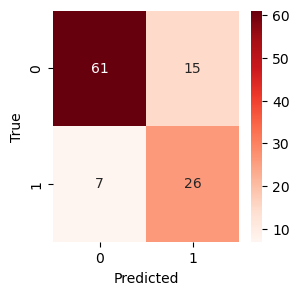

In [14]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)

score('LR',y_test,predictions_LR)

# GaussianNB

Model: GNB

accuracy_LR: 79.82 %

Precision:  62.22 %
Recall score:  84.85 %
F1 Score: 71.79 %
ROC score:  81.24 %


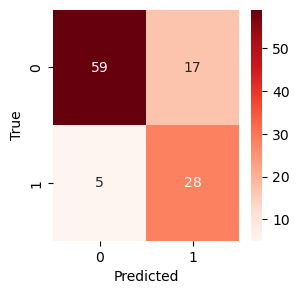

In [15]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions_GNB = GNB.predict(X_test)

score('GNB',y_test,predictions_GNB)

# Decision Tree Classifier

Model: DTC

accuracy_LR: 85.32 %

Precision:  74.29 %
Recall score:  78.79 %
F1 Score: 76.47 %
ROC score:  83.47 %


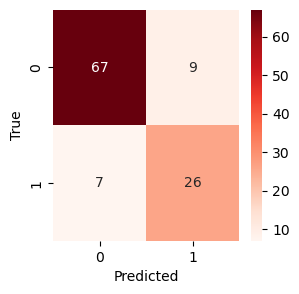

In [16]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
predictions_DTC = DTC.predict(X_test)

score('DTC',y_test,predictions_DTC)

# Random Forest Classifier

Model: RandomForest

accuracy_LR: 92.66 %

Precision:  87.88 %
Recall score:  87.88 %
F1 Score: 87.88 %
ROC score:  91.31 %


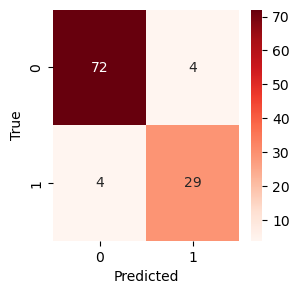

In [17]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RFC = RFC.predict(X_test)

score('RandomForest',y_test,predictions_RFC)

# SVC

Model: SVC

accuracy_LR: 70.64 %

Precision:  100.0 %
Recall score:  3.03 %
F1 Score: 5.88 %
ROC score:  51.52 %


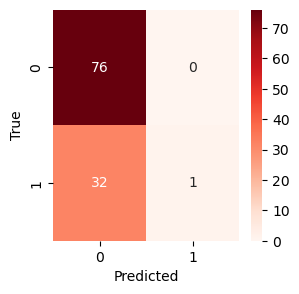

In [18]:
SVC = SVC()
SVC.fit(X_train, y_train)
predictions_SVC = SVC.predict(X_test)

score('SVC',y_test,predictions_SVC)

# Multinomial NB

Model: MNB

accuracy_LR: 35.78 %

Precision:  30.53 %
Recall score:  87.88 %
F1 Score: 45.31 %
ROC score:  50.52 %


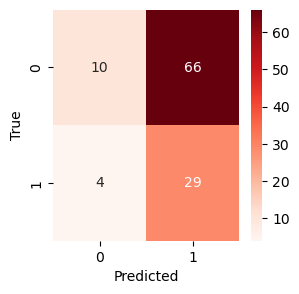

In [19]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions_MNB = MNB.predict(X_test)

score('MNB',y_test,predictions_MNB)

# MLP Classifier

Model: MLP

accuracy_LR: 66.06 %

Precision:  45.0 %
Recall score:  54.55 %
F1 Score: 49.32 %
ROC score:  62.8 %


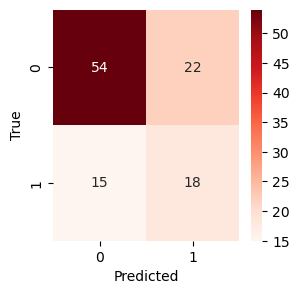

In [20]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
MLP.fit(X_train, y_train)
predictions_MLP = MLP.predict(X_test)

score('MLP',y_test,predictions_MLP)

# Linear SVC

Model: LinearSVC

accuracy_LR: 87.16 %

Precision:  91.3 %
Recall score:  63.64 %
F1 Score: 75.0 %
ROC score:  80.5 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


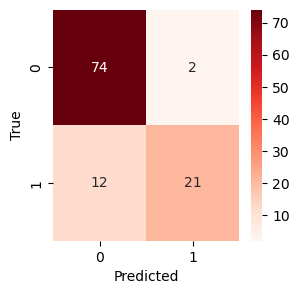

In [21]:
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
predictions_LSVC = LSVC.predict(X_test)

score('LinearSVC',y_test,predictions_LSVC)

# K Neighbors Classifier

In [22]:
# KNN = KNeighborsClassifier()
# KNN.fit(X_train, y_train)
# predictions_KNN = KNN.predict(X)
# score('KNN',y_test,predictions_KNN)

# Gradient Boosting

Model: GBC

accuracy_LR: 93.58 %

Precision:  88.24 %
Recall score:  90.91 %
F1 Score: 89.55 %
ROC score:  92.82 %


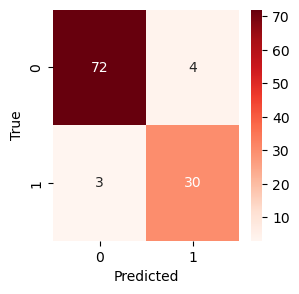

In [23]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predictions_GBC = GBC.predict(X_test)

score('GBC',y_test,predictions_GBC)

# Extra Tree Classifier

Model: ETC

accuracy_LR: 92.66 %

Precision:  90.32 %
Recall score:  84.85 %
F1 Score: 87.5 %
ROC score:  90.45 %


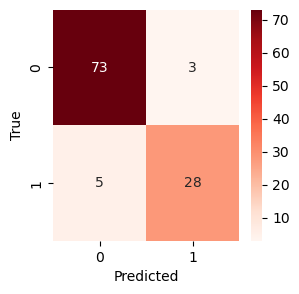

In [24]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)
predictions_ETC = ETC.predict(X_test)

score('ETC',y_test,predictions_ETC)

# BernoulliNB

Model: BNB

accuracy_LR: 86.24 %

Precision:  73.68 %
Recall score:  84.85 %
F1 Score: 78.87 %
ROC score:  85.85 %


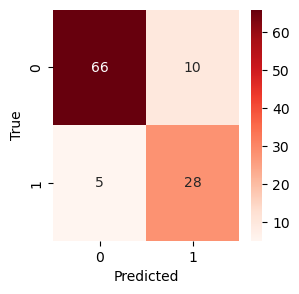

In [25]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions_BNB = BNB.predict(X_test)

score('BNB',y_test,predictions_BNB)

# AdaBoost

Model: ABC

accuracy_LR: 88.07 %

Precision:  77.78 %
Recall score:  84.85 %
F1 Score: 81.16 %
ROC score:  87.16 %


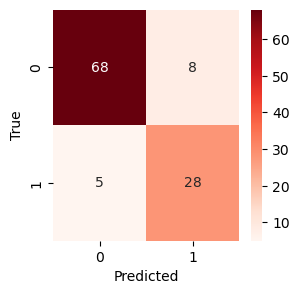

In [26]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predictions_ABC = ABC.predict(X_test)

score('ABC',y_test,predictions_ABC)

# Accuracy comparison

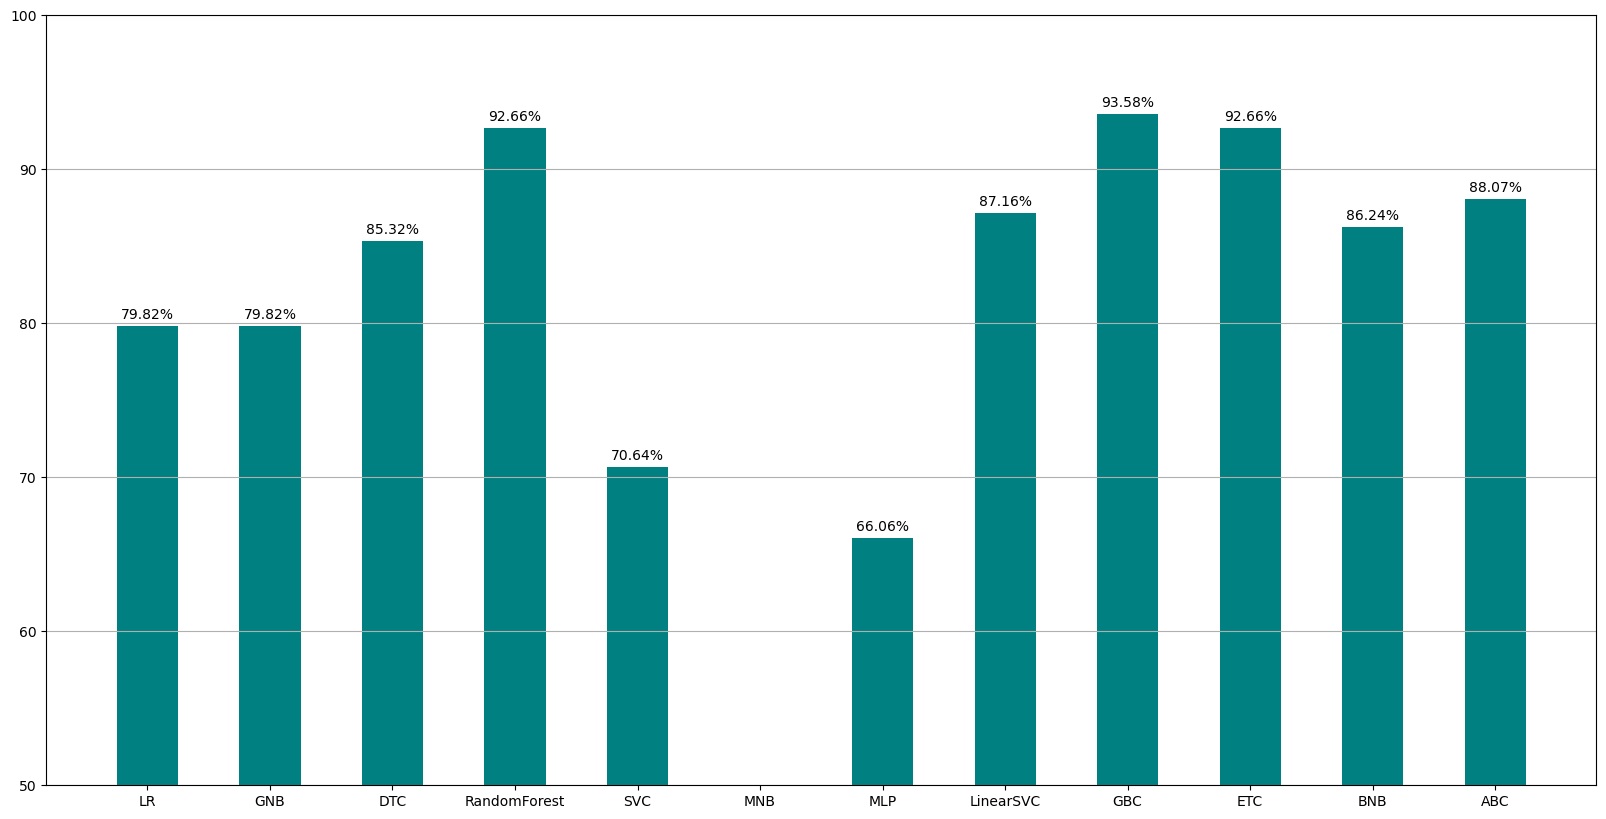

In [27]:
plt.figure(figsize=(20, 10))
bars = plt.bar(models, accuracy, color='teal', width=0.5)
plt.ylim(50, 100)
plt.grid(True, axis='y')

# Add data labels (accuracy values) above each bar
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    plt.annotate(f'{acc:.2f}%',  # Format accuracy to two decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset label above the bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()

# ROC Curves

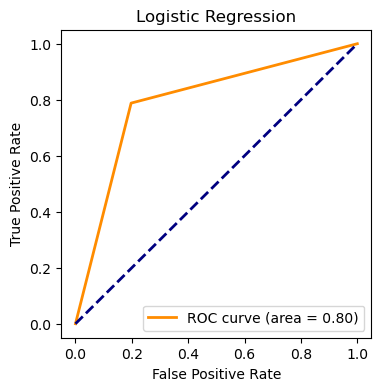

In [28]:
LR_fpr, LR_tpr, threshold = roc_curve(y_test, predictions_LR)
LR_auc = auc(LR_fpr, LR_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(LR_fpr, LR_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {LR_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")
plt.show()

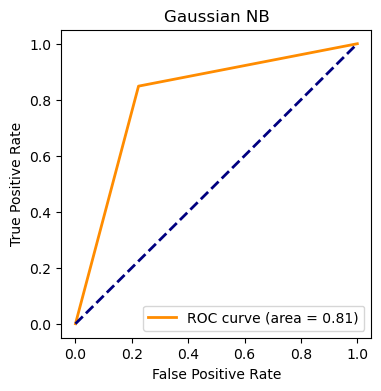

In [29]:
GNB_fpr, GNB_tpr, threshold = roc_curve(y_test, predictions_GNB)
GNB_auc = auc(GNB_fpr, GNB_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(GNB_fpr, GNB_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {GNB_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian NB')
plt.legend(loc="lower right")
plt.show()

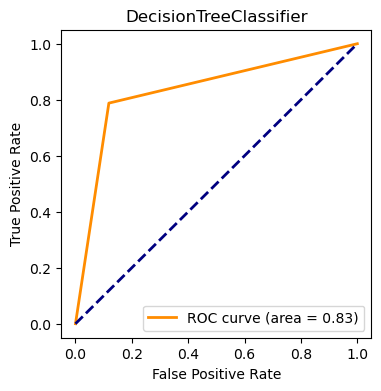

In [30]:
DTC_fpr, DTC_tpr, threshold = roc_curve(y_test, predictions_DTC)
DTC_auc = auc(DTC_fpr, DTC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(DTC_fpr, DTC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {DTC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()

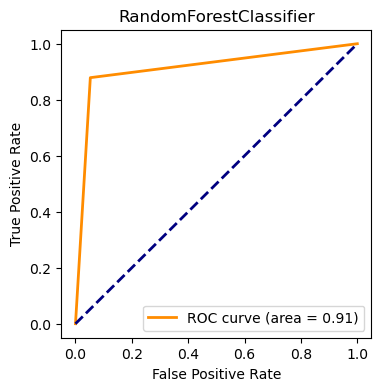

In [31]:
RFC_fpr, RFC_tpr, threshold = roc_curve(y_test, predictions_RFC)
RFC_auc = auc(RFC_fpr, RFC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(RFC_fpr, RFC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {RFC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

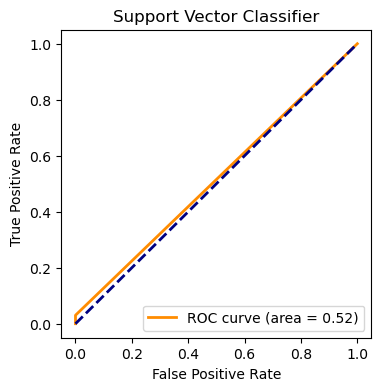

In [32]:
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, predictions_SVC)
SVC_auc = auc(SVC_fpr, SVC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(SVC_fpr, SVC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {SVC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()

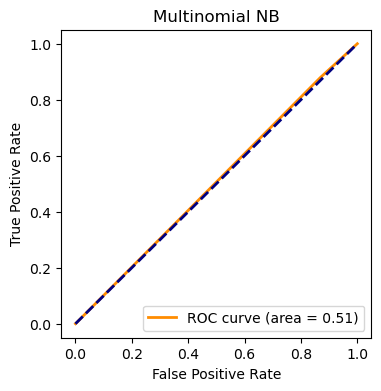

In [33]:
MNB_fpr, MNB_tpr, threshold = roc_curve(y_test, predictions_MNB)
MNB_auc = auc(MNB_fpr, MNB_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(MNB_fpr, MNB_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {MNB_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial NB')
plt.legend(loc="lower right")
plt.show()

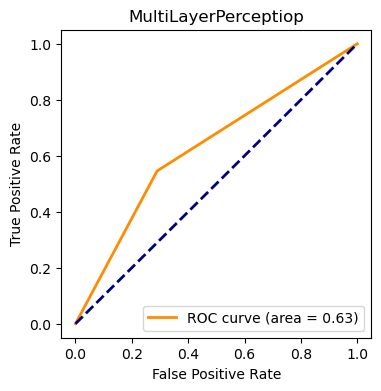

In [34]:
MLP_fpr, MLP_tpr, threshold = roc_curve(y_test, predictions_MLP)
MLP_auc = auc(MLP_fpr, MLP_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(MLP_fpr, MLP_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {MLP_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MultiLayerPerceptiop')
plt.legend(loc="lower right")
plt.show()

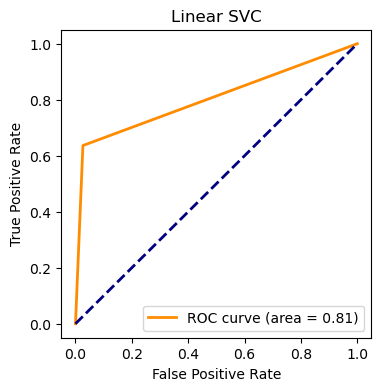

In [35]:
LSVC_fpr, LSVC_tpr, threshold = roc_curve(y_test, predictions_LSVC)
LSVC_auc = auc(LSVC_fpr, LSVC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(LSVC_fpr, LSVC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {LSVC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVC')
plt.legend(loc="lower right")
plt.show()

In [41]:
# KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, predictions_KNN)
# KNN_auc = auc(KNN_fpr, KNN_tpr)
# plt.figure(figsize=(4, 4), dpi=100)
# plt.plot(KNN_fpr, KNN_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {KNN_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('KNN')
# plt.legend(loc="lower right")
# plt.show()

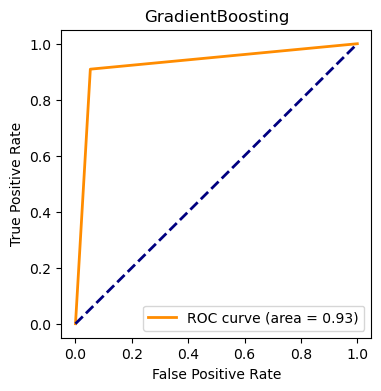

In [37]:
GBC_fpr, GBC_tpr, threshold = roc_curve(y_test, predictions_GBC)
GBC_auc = auc(GBC_fpr, GBC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(GBC_fpr, GBC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {GBC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoosting')
plt.legend(loc="lower right")
plt.show()

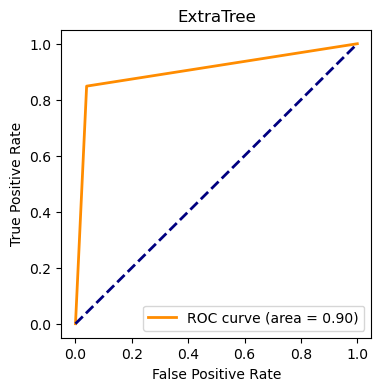

In [38]:
ETC_fpr, ETC_tpr, threshold = roc_curve(y_test, predictions_ETC)
ETC_auc = auc(ETC_fpr, ETC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(ETC_fpr, ETC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {ETC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ExtraTree')
plt.legend(loc="lower right")
plt.show()

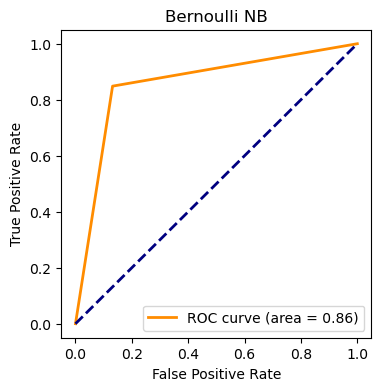

In [39]:
BNB_fpr, BNB_tpr, threshold = roc_curve(y_test, predictions_BNB)
BNB_auc = auc(BNB_fpr, BNB_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(BNB_fpr, BNB_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {BNB_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bernoulli NB')
plt.legend(loc="lower right")
plt.show()

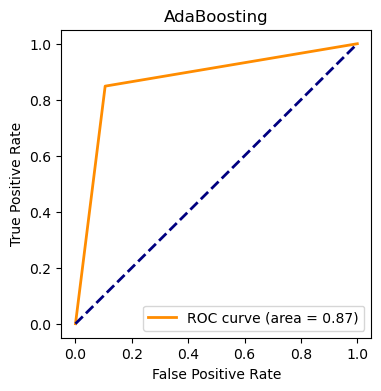

In [40]:
ABC_fpr, ABC_tpr, threshold = roc_curve(y_test, predictions_ABC)
ABC_auc = auc(ABC_fpr, ABC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(ABC_fpr, ABC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {ABC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoosting')
plt.legend(loc="lower right")
plt.show()

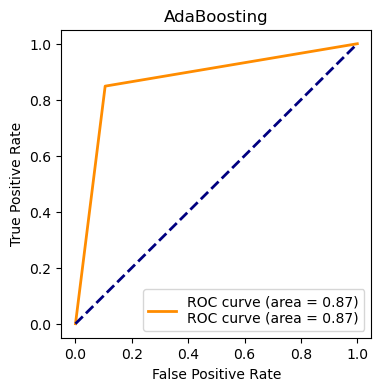

In [50]:
ABC_fpr, ABC_tpr, threshold = roc_curve(y_test, predictions_ABC)
ABC_auc = auc(ABC_fpr, ABC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(ABC_fpr, ABC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {ABC_auc:.2f})\nROC curve (area = {ABC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoosting')
plt.legend(loc="lower right")
plt.show()

In [52]:
roc_log = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(predictions_ABC, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(y_test, axis=1), np.argmax(predictions_ABC, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

ValueError: `axis` must be fewer than the number of dimensions (1)

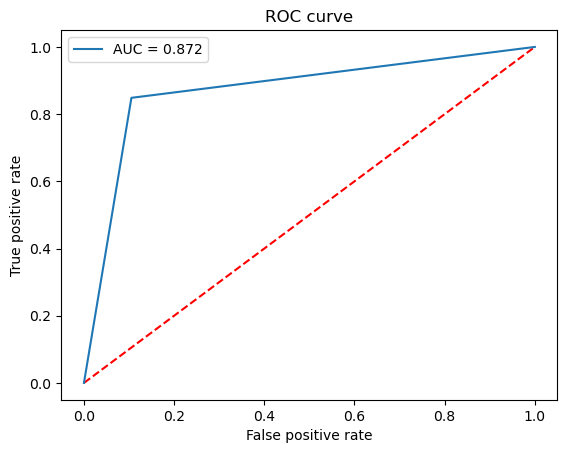

In [59]:
# Assuming y_test and predictions_ABC are numpy arrays
# y_test_argmax = np.argmax(y_test, axis=1)
# predictions_ABC_argmax = np.argmax(predictions_ABC, axis=1)

roc_log = roc_auc_score(y_test, predictions_ABC)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_ABC)
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()